In [69]:
import re
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.gridspec as gridspec
from collections import OrderedDict


In [ ]:
def ordenar_dados(dados):
    """
    Ordena os dados por classe, método e valor.

    Args:
        dados: O dicionário com os dados a serem ordenados.

    Returns:
        Um novo dicionário com os dados ordenados.
    """

    dados_ordenados = OrderedDict()
    for classe, metodos in dados.items():
        dados_ordenados[classe] = OrderedDict()
        for metodo, valores in sorted(metodos.items(), key=lambda item: item[1][0]):  # Comparando o primeiro valor da lista
            dados_ordenados[classe][metodo] = sorted(valores, reverse=True)
    return dados_ordenados

In [119]:
# Função para extrair os F1-scores de um arquivo de log
def extrair_log_infos(log_path):
    with open(log_path, 'r') as f:
        log_content = f.read()
    
    # Regex para pegar a lista de F1-scores
    f1_match = re.search(r"'test/F1-scores\s+':\s+\[([^\]]+)\]", log_content)
    prec_match = re.search(r"'test/Precisions\s+':\s+\[([^\]]+)\]", log_content)
    rec_match = re.search(r"'test/Recalls\s+':\s+\[([^\]]+)\]", log_content)
    if f1_match:
        f1_scores = [float(score.strip()) for score in f1_match.group(1).split(',')]
        prec_scores = [float(score.strip()) for score in prec_match.group(1).split(',')]
        rec_scores = [float(score.strip()) for score in rec_match.group(1).split(',')]
        return f1_scores, prec_scores, rec_scores
    else:
        return None

# Diretório onde estão os logs
log_dir = "experiments/chesapeake-bkg"

# Inicializa um dicionário para armazenar os F1-scores por BGClass e método
resultados = {}
precisions = {}
recalls = {}

# Loop para iterar sobre os logs
arquivos = os.listdir(log_dir)
arquivos.sort()
for log_file in arquivos:
    if log_file.endswith(".log"):  # Verifica se é um arquivo de log
        parts = log_file.split('_')
        metodo = parts[2]  # Pega o nome do método (baseado no nome do arquivo)
        bgclass = parts[4].replace('bgclass', '')  # Pega o valor de BGClass
        
        log_path = os.path.join(log_dir, log_file)
        f1_scores, precs, recs = extrair_log_infos(log_path)
        
        if f1_scores:
            if bgclass not in resultados:
                resultados[bgclass] = {}
                precisions[bgclass] = {}
                recalls[bgclass] = {}
            resultados[bgclass][metodo] = f1_scores
            precisions[bgclass][metodo] = precs
            recalls[bgclass][metodo] = recs

print(f1_scores)
print(precs)

[0.12129414266868249, 0.024544281427990866, 0.026428873863085, 0.11933710035092, 0.07483219600190388, 0.07595383341381155]
[0.06545676721787251, 0.03456230215827073, 0.22214049597377064, 0.5484077100720884, 0.13611882555016772, 0.2260000757353405]


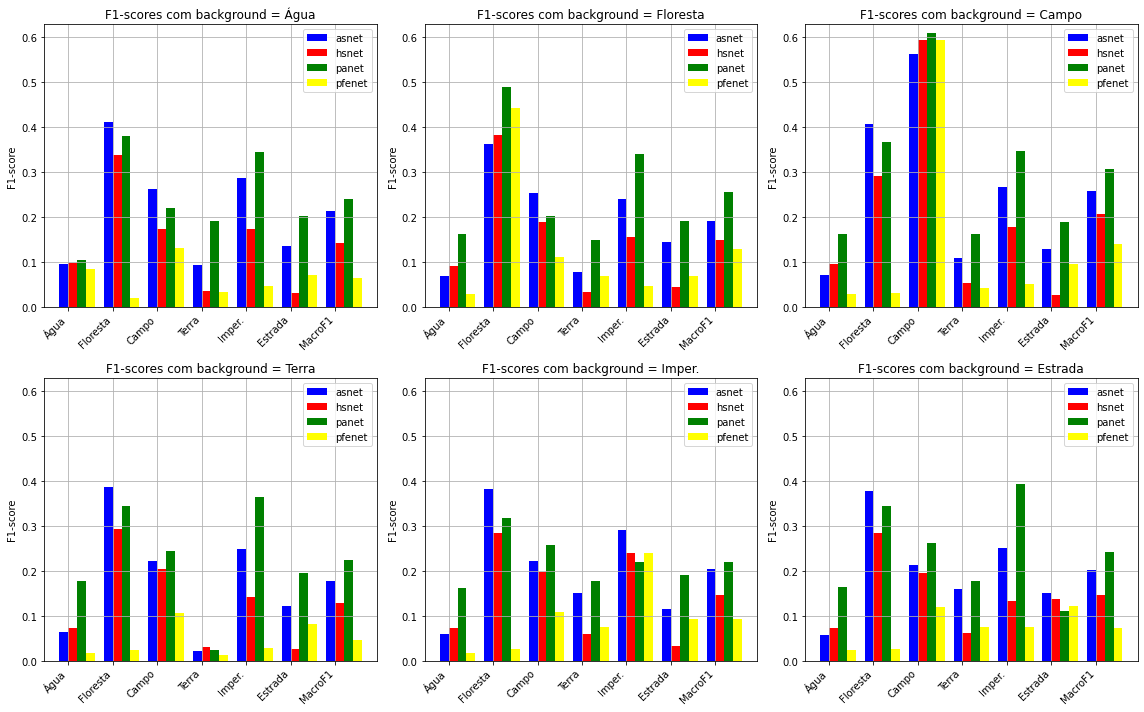

In [126]:
# Define o número de linhas e colunas da grade de subplots
num_rows = 2  # Ajuste conforme o número de classes
num_cols = 3  # Ajuste conforme o número de classes

# Cria a figura e a grade de subplots
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(num_rows, num_cols)

# Encontra o valor máximo de F1-score para definir o limite superior do eixo y
max_f1_score = max(max(f1_scores) for dados in resultados.values() for f1_scores in dados.values())
classes = ["Água", "Floresta", "Campo", "Terra", "Imper.", "Estrada"]
classes.append("MacroF1")  # Adiciona o nome para a coluna extra do macroF1
colors = {'asnet': 'blue', 'panet': 'green', 'hsnet': 'red', 'pfenet': 'yellow'}
new_order = [0, 1, 2, 3, 4, 5]

# Itera sobre as classes e cria os subplots
for i, (bgclass, dados) in enumerate(resultados.items()):
    ax = fig.add_subplot(gs[i])
    x = np.arange(len(classes))  # Atualiza o x com a nova classe "MacroF1"
    width = 0.2
    
    if i > 0:
        get = new_order[i], new_order[i-1]
        new_order[i-1], new_order[i] = get

    macro_f1 = {}
    for j, (metodo, f1_scores) in enumerate(dados.items()):
        # Plota as barras das classes individuais
        ax.bar(x[:-1] + j*width, [f1_scores[i] for i in new_order], width=width, label=metodo, color=colors[metodo])
        # Calcula e armazena o macro F1 para cada método
        macro_f1[metodo] = np.mean(f1_scores)
        # Plota a barra para o macroF1
        ax.bar(x[-1] + j*width, macro_f1[metodo], width=width, color=colors[metodo])

    # Configurações de visualização do gráfico
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(classes, rotation=45, ha="right")  # Rotaciona as labels para melhor visualização
    ax.set_ylabel("F1-score")
    ax.set_title(f"F1-scores com background = {classes[int(bgclass)-1]}")
    ax.set_ylim(0, max_f1_score + 0.02)  # Define o limite superior do eixo y
    ax.legend()
    ax.grid()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()



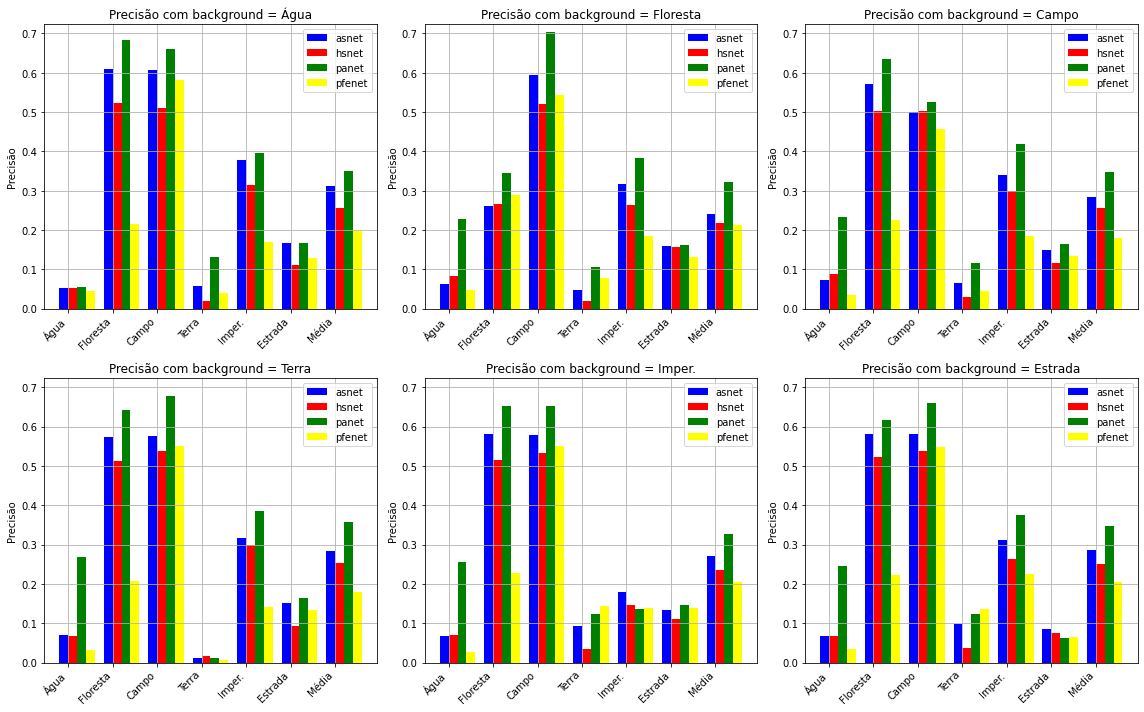

In [125]:
# Define o número de linhas e colunas da grade de subplots
num_rows = 2  # Ajuste conforme o número de classes
num_cols = 3  # Ajuste conforme o número de classes

# Cria a figura e a grade de subplots
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(num_rows, num_cols)
# Encontra o valor máximo de F1-score para definir o limite superior do eixo y
# max_f1_score = max(max(f1_scores) for dados in resultados.values() for f1_scores in dados.values())

max_precision = max(max(precs) for dados in precisions.values() for precs in dados.values())
classes = ["Água", "Floresta", "Campo", "Terra", "Imper.", "Estrada"]
classes.append("Média")  # Adiciona o nome para a coluna extra do macroF1
colors = {'asnet': 'blue', 'panet': 'green', 'hsnet': 'red', 'pfenet': 'yellow'}
new_order = [0, 1, 2, 3, 4, 5]

# Itera sobre as classes e cria os subplots
for i, (bgclass, dados) in enumerate(precisions.items()):
    ax = fig.add_subplot(gs[i])
    x = np.arange(len(classes))  # Atualiza o x com a nova classe "MacroF1"
    width = 0.2
    
    if i > 0:
        get = new_order[i], new_order[i-1]
        new_order[i-1], new_order[i] = get

    macro_f1 = {}
    for j, (metodo, f1_scores) in enumerate(dados.items()):
        # Plota as barras das classes individuais
        ax.bar(x[:-1] + j*width, [f1_scores[i] for i in new_order], width=width, label=metodo, color=colors[metodo])
        # Calcula e armazena o macro F1 para cada método
        macro_f1[metodo] = np.mean(f1_scores)
        # Plota a barra para o macroF1
        ax.bar(x[-1] + j*width, macro_f1[metodo], width=width, color=colors[metodo])

    # Configurações de visualização do gráfico
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(classes, rotation=45, ha="right")  # Rotaciona as labels para melhor visualização
    ax.set_ylabel("Precisão")
    ax.set_title(f"Precisão com background = {classes[int(bgclass)-1]}")
    ax.set_ylim(0, max_precision + 0.02)  # Define o limite superior do eixo y
    ax.legend()
    ax.grid()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()



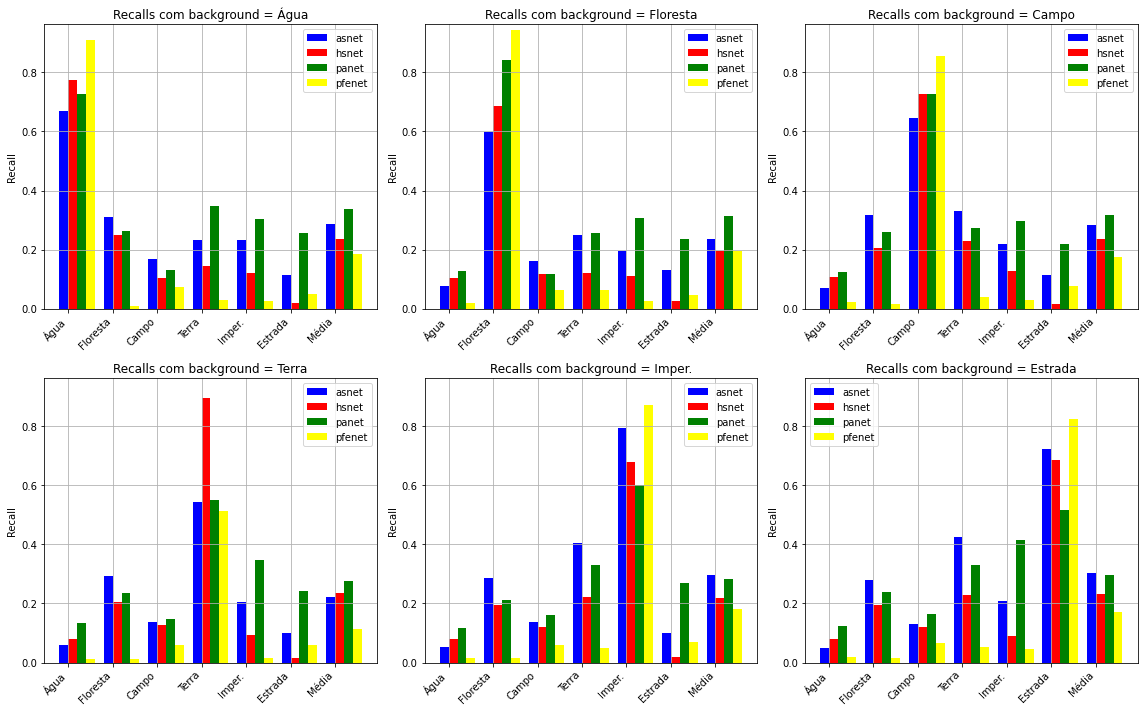

In [124]:
# Define o número de linhas e colunas da grade de subplots
num_rows = 2  # Ajuste conforme o número de classes
num_cols = 3  # Ajuste conforme o número de classes

# Cria a figura e a grade de subplots
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(num_rows, num_cols)
# Encontra o valor máximo de F1-score para definir o limite superior do eixo y
# max_f1_score = max(max(f1_scores) for dados in resultados.values() for f1_scores in dados.values())

max_recall = max(max(recs) for dados in recalls.values() for recs in dados.values())
classes = ["Água", "Floresta", "Campo", "Terra", "Imper.", "Estrada"]
classes.append("Média")  # Adiciona o nome para a coluna extra do macroF1
colors = {'asnet': 'blue', 'panet': 'green', 'hsnet': 'red', 'pfenet': 'yellow'}
new_order = [0, 1, 2, 3, 4, 5]

# Itera sobre as classes e cria os subplots
for i, (bgclass, dados) in enumerate(recalls.items()):
    ax = fig.add_subplot(gs[i])
    x = np.arange(len(classes))  # Atualiza o x com a nova classe "MacroF1"
    width = 0.2
    
    if i > 0:
        get = new_order[i], new_order[i-1]
        new_order[i-1], new_order[i] = get

    macro_f1 = {}
    for j, (metodo, f1_scores) in enumerate(dados.items()):
        # Plota as barras das classes individuais
        ax.bar(x[:-1] + j*width, [f1_scores[i] for i in new_order], width=width, label=metodo, color=colors[metodo])
        # Calcula e armazena o macro F1 para cada método
        macro_f1[metodo] = np.mean(f1_scores)
        # Plota a barra para o macroF1
        ax.bar(x[-1] + j*width, macro_f1[metodo], width=width, color=colors[metodo])

    # Configurações de visualização do gráfico
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(classes, rotation=45, ha="right")  # Rotaciona as labels para melhor visualização
    ax.set_ylabel("Recall")
    ax.set_title(f"Recalls com background = {classes[int(bgclass)-1]}")
    ax.set_ylim(0, max_recall + 0.02)  # Define o limite superior do eixo y
    ax.legend()
    ax.grid()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

